Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Understanding

Dataset-https://data.sfgov.org/Public-Safety/Traffic-Crashes-Resulting-in-Injury/ubvf-ztfx

In [2]:
df = pd.read_csv("Traffic_Crashes_Resulting_in_Injury-main.csv")
df.head()

C:\Users\surit\AppData\Local\Temp\ipykernel_15636\1090088467.py:1: DtypeWarning: Columns (4,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Traffic_Crashes_Resulting_in_Injury-main.csv")


,id,unique_id,cnn_intrsctn_fkey,cnn_sgmt_fkey,case_id_pkey,tb_latitude,tb_longitude,geocode_source,geocode_location,collision_datetime,...,party2_move_pre_acc,point,data_as_of,data_updated_at,data_loaded_at,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,vw_geo_sfpd_cr_switrs_all_types_col_cty_union....,22541,26470000,5903000.0,130374450,37.774953,-122.453139,SFPD-CROSSROADS,CITY STREET,5/7/2013 16:35,...,Stopped In Road,POINT (-122.45314 37.774952),NaN,NaN,3/25/2023 3:30,12.0,12.0,7.0,4.0,18.0
1,vw_geo_sfpd_cr_switrs_all_types_col_cty_union....,8968,24083000,NaN,130797608,37.757167,-122.416720,SFPD-CROSSROADS,CITY STREET,9/22/2013 1:15,...,Stopped In Road,POINT (-122.41672 37.757168),NaN,NaN,3/25/2023 3:30,53.0,53.0,3.0,2.0,20.0
2,vw_geo_sfpd_cr_switrs_all_types_col_cty_union....,18399,30756000,NaN,140070870,37.771886,-122.423397,SFPD-CROSSROADS,CITY STREET,1/24/2014 15:38,...,Not Stated,POINT (-122.42339 37.771885),NaN,NaN,3/25/2023 3:30,32.0,32.0,1.0,5.0,20.0
3,vw_geo_sfpd_cr_switrs_all_types_col_cty_union....,44333,27966000,6435101.0,170778743,37.769543,-122.510739,SFPD-CROSSROADS,CITY STREET,9/23/2017 22:02,...,NaN,POINT (-122.51074 37.769543),NaN,NaN,3/25/2023 3:30,9.0,9.0,8.0,4.0,12.0
4,vw_geo_sfpd_cr_switrs_all_types_col_cty_union....,50283,27286000,316000.0,190787940,37.782518,-122.464393,SFPD-INTERIM DB,CITY STREET,10/19/2019 9:29,...,NaN,POINT (-122.46439 37.782516),NaN,NaN,3/25/2023 3:30,5.0,5.0,8.0,4.0,11.0


In [3]:
df.shape

(55300, 61)

In [4]:
df.columns

Index(['id', 'unique_id', 'cnn_intrsctn_fkey', 'cnn_sgmt_fkey', 'case_id_pkey',
       'tb_latitude', 'tb_longitude', 'geocode_source', 'geocode_location',
       'collision_datetime', 'collision_date', 'collision_time',
       'accident_year', 'month', 'day_of_week', 'time_cat', 'juris',
       'officer_id', 'reporting_district', 'beat_number', 'primary_rd',
       'secondary_rd', 'distance', 'direction', 'weather_1', 'weather_2',
       'collision_severity', 'type_of_collision', 'mviw', 'ped_action',
       'road_surface', 'road_cond_1', 'road_cond_2', 'lighting',
       'control_device', 'intersection', 'vz_pcf_code', 'vz_pcf_group',
       'vz_pcf_description', 'vz_pcf_link', 'number_killed', 'number_injured',
       'street_view', 'dph_col_grp', 'dph_col_grp_description',
       'party_at_fault', 'party1_type', 'party1_dir_of_travel',
       'party1_move_pre_acc', 'party2_type', 'party2_dir_of_travel',
       'party2_move_pre_acc', 'point', 'data_as_of', 'data_updated_at',
       

In [5]:
df.collision_severity.value_counts()

Injury (Complaint of Pain)    35169
Injury (Other Visible)        15802
Injury (Severe)                3812
Fatal                           516
Medical                           1
Name: collision_severity, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55300 entries, 0 to 55299
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            55300 non-null  object 
 1   unique_id                     55300 non-null  int64  
 2   cnn_intrsctn_fkey             55300 non-null  int64  
 3   cnn_sgmt_fkey                 24932 non-null  float64
 4   case_id_pkey                  55300 non-null  object 
 5   tb_latitude                   55153 non-null  float64
 6   tb_longitude                  55153 non-null  float64
 7   geocode_source                55300 non-null  object 
 8   geocode_location              55300 non-null  object 
 9   collision_datetime            55292 non-null  object 
 10  collision_date                55300 non-null  object 
 11  collision_time                55244 non-null  object 
 12  accident_year                 55300 non-null  int64  
 13  m

In [7]:
df.drop(columns=['intersection','id','unique_id','case_id_pkey','collision_time','collision_datetime','collision_date','vz_pcf_link','street_view','point','data_as_of','data_updated_at','data_loaded_at'],inplace=True)

In [8]:
df.head()

,cnn_intrsctn_fkey,cnn_sgmt_fkey,tb_latitude,tb_longitude,geocode_source,geocode_location,accident_year,month,day_of_week,time_cat,...,party1_dir_of_travel,party1_move_pre_acc,party2_type,party2_dir_of_travel,party2_move_pre_acc,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,26470000,5903000.0,37.774953,-122.453139,SFPD-CROSSROADS,CITY STREET,2013,May,Tuesday,2:01 pm to 6:00 pm,...,West,Making Right Turn,Driver,East,Stopped In Road,12.0,12.0,7.0,4.0,18.0
1,24083000,NaN,37.757167,-122.416720,SFPD-CROSSROADS,CITY STREET,2013,September,Sunday,10:01 pm to 2:00 am,...,North,Proceeding Straight,Bicyclist,North,Stopped In Road,53.0,53.0,3.0,2.0,20.0
2,30756000,NaN,37.771886,-122.423397,SFPD-CROSSROADS,CITY STREET,2014,January,Friday,2:01 pm to 6:00 pm,...,South,Making Left Turn,Driver,Not Stated,Not Stated,32.0,32.0,1.0,5.0,20.0
3,27966000,6435101.0,37.769543,-122.510739,SFPD-CROSSROADS,CITY STREET,2017,September,Saturday,10:01 pm to 2:00 am,...,South,Ran Off Road,NaN,NaN,NaN,9.0,9.0,8.0,4.0,12.0
4,27286000,316000.0,37.782518,-122.464393,SFPD-INTERIM DB,CITY STREET,2019,October,Saturday,6:01 am to 10:00 am,...,West,Making U Turn,NaN,NaN,NaN,5.0,5.0,8.0,4.0,11.0


In [9]:
df.shape

(55300, 48)

In [10]:
print(df.dtypes)

cnn_intrsctn_fkey                 int64
cnn_sgmt_fkey                   float64
tb_latitude                     float64
tb_longitude                    float64
geocode_source                   object
geocode_location                 object
accident_year                     int64
month                            object
day_of_week                      object
time_cat                         object
juris                            object
officer_id                       object
reporting_district               object
beat_number                      object
primary_rd                       object
secondary_rd                     object
distance                        float64
direction                        object
weather_1                        object
weather_2                        object
collision_severity               object
type_of_collision                object
mviw                             object
ped_action                       object
road_surface                     object


Correlation Heatmap

C:\Users\surit\AppData\Local\Temp\ipykernel_15636\3109508394.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


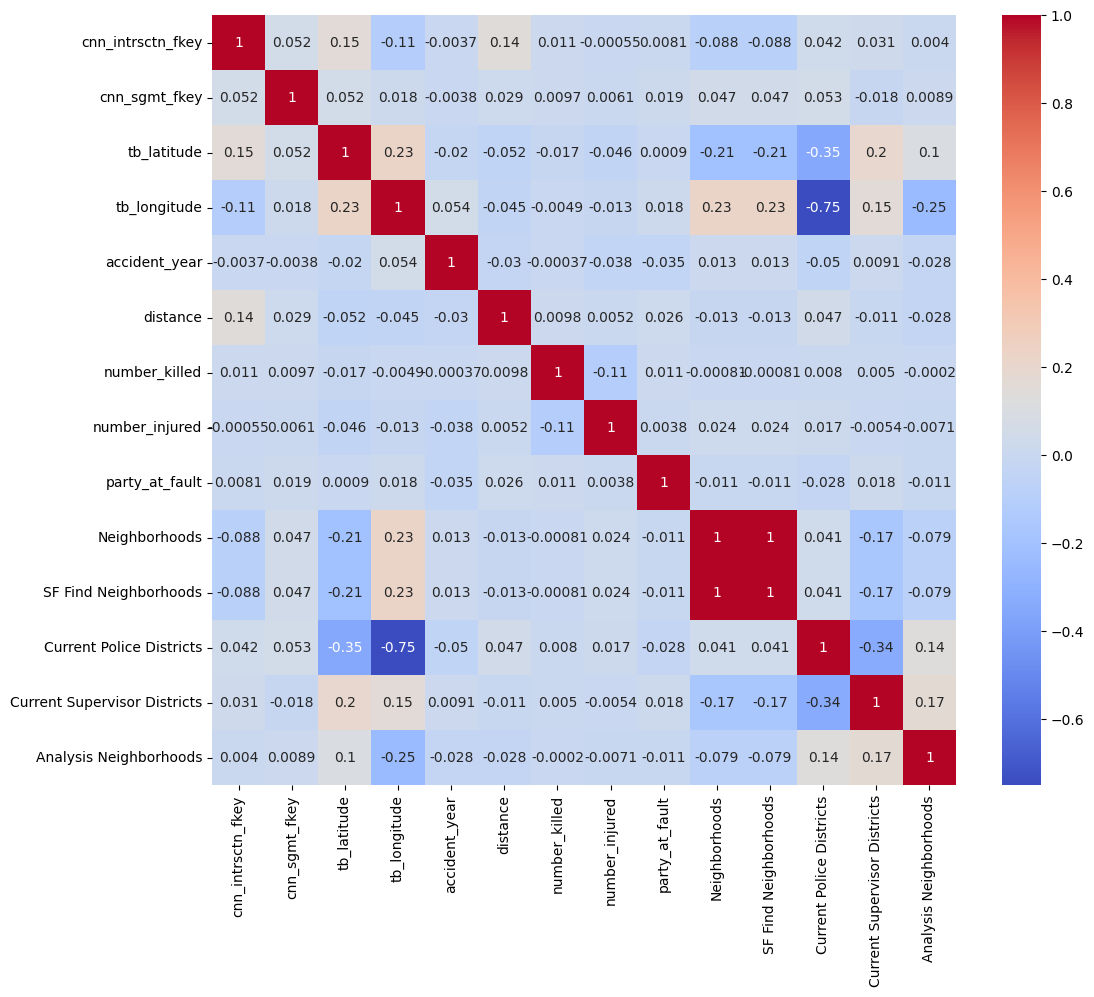

In [17]:
corr_matrix = df.corr()

# Set figure size
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder

cols = ['collision_severity', 'type_of_collision']

for col in cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [32]:
df.select_dtypes(include=['object']).columns

Index(['juris', 'officer_id', 'reporting_district', 'beat_number',
       'primary_rd', 'secondary_rd', 'direction', 'weather_1', 'weather_2',
       'mviw', 'ped_action', 'road_surface', 'road_cond_1', 'road_cond_2',
       'lighting', 'control_device', 'vz_pcf_code', 'vz_pcf_group',
       'vz_pcf_description', 'dph_col_grp', 'dph_col_grp_description',
       'party1_type', 'party1_dir_of_travel', 'party1_move_pre_acc',
       'party2_type', 'party2_dir_of_travel', 'party2_move_pre_acc'],
      dtype='object')

In [34]:
df.select_dtypes(include=['int64','int32','float64']).columns

Index(['cnn_intrsctn_fkey', 'cnn_sgmt_fkey', 'tb_latitude', 'tb_longitude',
       'geocode_source', 'geocode_location', 'accident_year', 'month',
       'day_of_week', 'time_cat', 'distance', 'collision_severity',
       'type_of_collision', 'number_killed', 'number_injured',
       'party_at_fault', 'Neighborhoods', 'SF Find Neighborhoods',
       'Current Police Districts', 'Current Supervisor Districts',
       'Analysis Neighborhoods', 'col'],
      dtype='object')

In [29]:
df_copy = df[df.select_dtypes(include=['int64','int32','float64']).columns]

In [30]:
df_copy.head()

,cnn_intrsctn_fkey,cnn_sgmt_fkey,tb_latitude,tb_longitude,geocode_source,geocode_location,accident_year,month,day_of_week,time_cat,...,type_of_collision,number_killed,number_injured,party_at_fault,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,col
0,26470000,5903000.0,37.774953,-122.453139,0,0,2013,8,5,3,...,1,0.0,1,1.0,12.0,12.0,7.0,4.0,18.0,3
1,24083000,NaN,37.757167,-122.416720,0,0,2013,11,3,1,...,6,0.0,1,1.0,53.0,53.0,3.0,2.0,20.0,1
2,30756000,NaN,37.771886,-122.423397,0,0,2014,4,0,3,...,0,0.0,1,NaN,32.0,32.0,1.0,5.0,20.0,3
3,27966000,6435101.0,37.769543,-122.510739,0,0,2017,11,2,1,...,5,0.0,1,1.0,9.0,9.0,8.0,4.0,12.0,1
4,27286000,316000.0,37.782518,-122.464393,1,0,2019,10,2,4,...,2,0.0,1,1.0,5.0,5.0,8.0,4.0,11.0,4


In [38]:
df_copy.drop(columns=['cnn_sgmt_fkey','col'],inplace=True)

C:\Users\surit\AppData\Local\Temp\ipykernel_15636\3976158862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.drop(columns=['cnn_sgmt_fkey','col'],inplace=True)


In [39]:
df_copy.isnull().sum()

cnn_intrsctn_fkey                  0
tb_latitude                      147
tb_longitude                     147
geocode_source                     0
geocode_location                   0
accident_year                      0
month                              0
day_of_week                        0
time_cat                           0
distance                          79
collision_severity                 0
type_of_collision                  0
number_killed                      3
number_injured                     0
party_at_fault                  5450
Neighborhoods                    767
SF Find Neighborhoods            767
Current Police Districts         230
Current Supervisor Districts     191
Analysis Neighborhoods           204
dtype: int64

In [42]:
df = df_copy.copy()

In [43]:
df['tb_latitude'].fillna(df['tb_latitude'].mean(), inplace=True)
df['tb_longitude'].fillna(df['tb_longitude'].mean(), inplace=True)
df['distance'].fillna(df['distance'].mean(), inplace=True)
df['party_at_fault'].fillna(df['party_at_fault'].mean(), inplace=True)
df['number_killed'].fillna(df['number_killed'].mean(), inplace=True)
df['Neighborhoods'].fillna(df['Neighborhoods'].mean(), inplace=True)
df['SF Find Neighborhoods'].fillna(df['SF Find Neighborhoods'].mean(), inplace=True)
df['Current Police Districts'].fillna(df['Current Police Districts'].mean(), inplace=True)
df['Current Supervisor Districts'].fillna(df['Current Supervisor Districts'].mean(), inplace=True)
df['Analysis Neighborhoods'].fillna(df['Analysis Neighborhoods'].mean(), inplace=True)

In [44]:
df.isnull().sum()

cnn_intrsctn_fkey               0
tb_latitude                     0
tb_longitude                    0
geocode_source                  0
geocode_location                0
accident_year                   0
month                           0
day_of_week                     0
time_cat                        0
distance                        0
collision_severity              0
type_of_collision               0
number_killed                   0
number_injured                  0
party_at_fault                  0
Neighborhoods                   0
SF Find Neighborhoods           0
Current Police Districts        0
Current Supervisor Districts    0
Analysis Neighborhoods          0
dtype: int64

In [45]:
df.shape

(55300, 20)

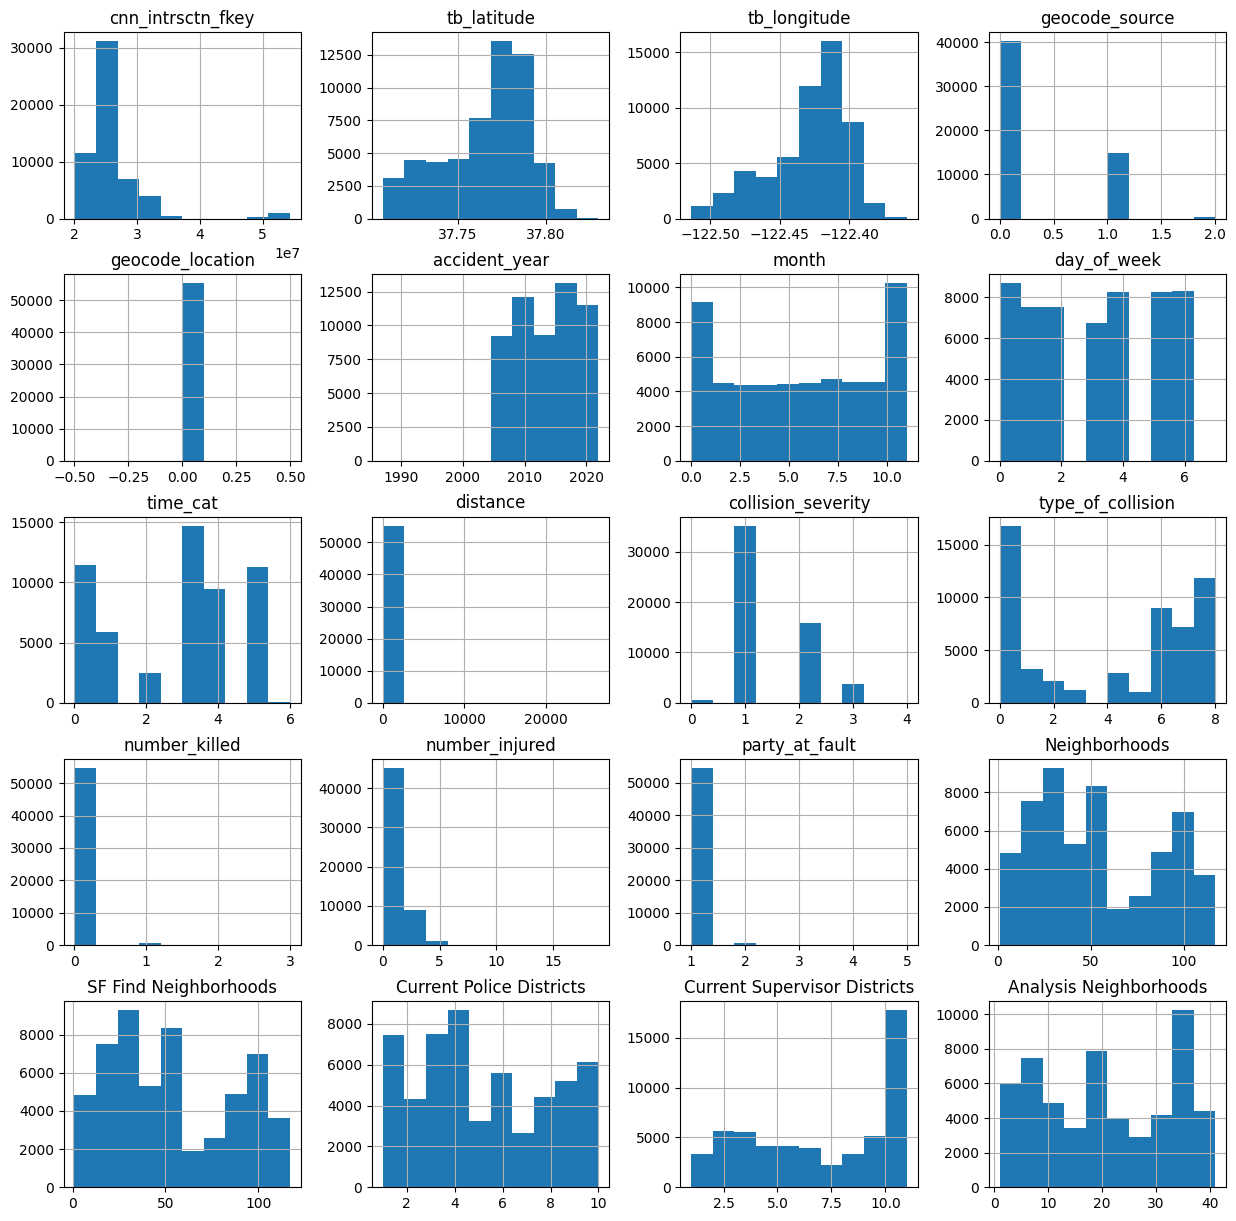

In [47]:
plot = df.hist(figsize=(15,15))

In [48]:
df.collision_severity.value_counts()

1    35169
2    15802
3     3812
0      516
4        1
Name: collision_severity, dtype: int64

In [49]:
X = df.drop(columns='collision_severity')
y = df['collision_severity']

Test Train Split

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [66]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train =  sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [59]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(X_train, y_train)

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

Random Forest Classifier

In [68]:
rf = RandomForestClassifier(max_depth=18)

rf.fit(X_train, y_train)

print('Train set score',rf.score(X_train, y_train))
print('Test set score',rf.score(X_test, y_test))

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

Train set score 0.8385292344786016
Test set score 0.6402893309222423
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       137
           1       0.65      0.97      0.78      8745
           2       0.41      0.07      0.11      4001
           3       0.00      0.00      0.00       942

    accuracy                           0.64     13825
   macro avg       0.51      0.51      0.47     13825
weighted avg       0.54      0.64      0.53     13825



Decision Tree Classifier

In [75]:
rf = DecisionTreeClassifier(max_depth=10)

rf.fit(X_train, y_train)

print('Train set score',rf.score(X_train, y_train))
print('Test set score',rf.score(X_test, y_test))

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

Train set score 0.6663773357444244
Test set score 0.63124773960217
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       137
           1       0.65      0.93      0.77      8745
           2       0.39      0.12      0.18      4001
           3       0.18      0.01      0.02       942
           4       0.00      0.00      0.00         0

    accuracy                           0.63     13825
   macro avg       0.44      0.41      0.39     13825
weighted avg       0.55      0.63      0.55     13825



c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\surit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [56]:
xg = XGBClassifier()

xg.fit(X_train, y_train)

print('Train set score',xg.score(X_train, y_train))
print('Test set score',xg.score(X_test, y_test))

Train set score 0.7140928270042194
Test set score 0.6376853526220615
